### Chaotic dynamical systems
This notebook illustrates two ordinary differential equations that exhibit chaotic behavior.

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.integrate import solve_ivp

def lorenz(t, u, *pars):
    sigma = pars[0]
    rho = pars[1]
    beta = pars[2]
    f = [ sigma*(u[1]-u[0]), rho*u[0]-u[1]-u[0]*u[2], u[0]*u[1]-beta*u[2] ]
    return f

def roessler(t, u, *pars):
    a = pars[0]
    b = pars[1]
    c = pars[2]
    f = [ -u[1]-u[2], u[0]+a*u[1], b-c*u[2]+u[0]*u[2] ]
    return f

#### Lorenz system
The Lorenz system is given by
$$
\begin{align}
\dot{x} & = \sigma (y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = bxy - \beta z
\end{align}
$$
where $(\sigma,\rho,\beta)=(10, 28, 8/3)$ will result in chaotic dynamics.

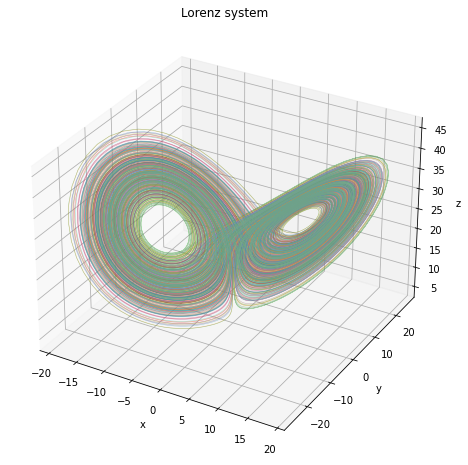

In [2]:
sigma = 10
rho = 28
beta = 8/3

u0 = [2, 8, 23.5]
T = 100
N = 10

pars = (sigma, rho, beta)
t = np.linspace(0, T, int(100*T))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(1,0,N)))
for n in range(N):
    u0 = [2, 8, 23.5] + np.random.uniform(-0.5, 0.5, 3)
    soln = solve_ivp(lorenz, [0, T], u0, t_eval=t, args=pars)
    ax.plot(soln.y[0], soln.y[1], soln.y[2], linewidth=0.5, alpha=0.4)
ax.set_title('Lorenz system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

#### Rössler system
The Rössler system is given by
$$
\begin{align}
\dot{x} & = -y-z \\
\dot{y} & = x+ay \\
\dot{z} & = b-cz+xz
\end{align}
$$
with $a,b=0.1$, where $c$ varies between 4 and 8.7.

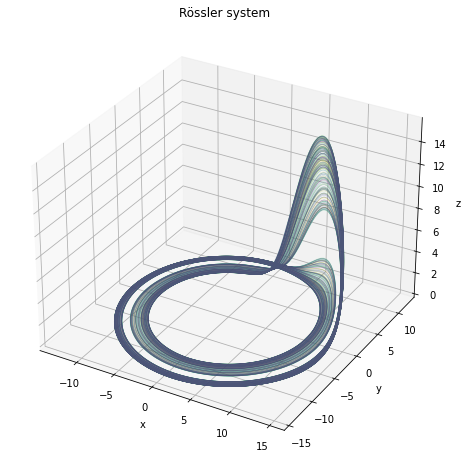

In [3]:
a = 0.1
b = 0.1
c = 9

u0 = [1, 1, 1]
T = 300
N = 10

pars = (a, b, c)
t = np.linspace(0, T, int(100*T))

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.plasma(np.linspace(0,1,N)))
soln = solve_ivp(roessler, [0, 5000], u0, args=pars)
u0 = [soln.y[0][-1], soln.y[1][-1], soln.y[2][-1]]
for n in range(N):
    u1 = u0 + np.random.uniform(-0.01, 0.01, 3)
    soln = solve_ivp(roessler, [0, T], u1, t_eval=t, args=pars)
    ax.plot(soln.y[0], soln.y[1], soln.y[2], linewidth=0.5, alpha=0.25)
ax.set_title('Rössler system')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()